<a href="https://colab.research.google.com/github/33quitykubby/Rabbit_DNN_1_2/blob/main/Rabbit_DNN_1_backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 誤差逆伝播



# 日本時間にする

In [ ]:
  !rm /etc/localtime
  !ln -s /usr/share/zoneinfo/Asia/Tokyo /etc/localtime
  !date

Sat Apr 24 07:19:06 JST 2021


# ライブラリのインポート

In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import os
import glob

import librosa

import datetime

import gc

from sklearn.datasets import load_boston
from pandas import DataFrame

In [ ]:
#開始時刻
start_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
print("start_time=",start_time)

start_time= 2021-04-24 07:19:06.465109+09:00


# 乱数シードの初期化






In [ ]:
import os 
import numpy as np
from sklearn import model_selection
import tensorflow as tf
import random

COMMON_SEED = 0
STANDARD_SEED = 0
NP_SEED = 0
TF_SEED = 0 

# np.random.seed(STANDARD_SEED)
# random.seed(NP_SEED)
# tf.random.set_seed(TF_SEED)

def seed_everything():
    random.seed(STANDARD_SEED)
    os.environ['PYTHONHASHSEED'] = str(COMMON_SEED)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    np.random.seed(NP_SEED)
    tf.random.set_seed(TF_SEED)
    session_conf = tf.compat.v1.ConfigProto(
        intra_op_parallelism_threads=1,
        inter_op_parallelism_threads=1
    )
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)


In [ ]:
#乱数シード固定

seed_everything()

# パス定義

# 順伝播　（単層）



In [ ]:
#活性化関数(恒等関数)

def func_identity (u):
  #出力
  z = u #恒等関数
  return z

In [ ]:
#順伝播　単層　単ユニット

def forward(W, b, x):
  #総入力
  u = np.dot(x, W) + b
  # print("u=x・w + b=",u)

  return func_identity(u)


In [ ]:
#計算

#重み
W = np.array([[0.1],[0.2],[0.3]]) #3行一列
print("W.shape=",W.shape)
print("W=",W)

#バイアス
b=0.5
print("b=",b)

#入力値
x = np.array([2,3,5])#1行三列
print("x.shape=",x.shape) 
print("x=",x) 

z = forward(W, b, x)
print("---------------------------------")
print("z=",z)

W.shape= (3, 1)
W= [[0.1]
 [0.2]
 [0.3]]
b= 0.5
x.shape= (3,)
x= [2 3 5]
---------------------------------
z= [2.8]


# 誤差関数 (二乗和誤差）

正解値 d=4とする  

二乗和誤差
$$E= \frac{1}{2}\sum_{k}{(y_k-t_k)^2}$$


In [ ]:
def sum_squared_error(y, d):
  return 0.5*sum((y - d)**2)

In [ ]:
d = 4

E = sum_squared_error(z, d)
print("E.shape=",E.shape)
print("E=",E)


E.shape= ()
E= 0.7200000000000002


# 誤差逆伝播による重み、バイアス更新量計算

In [ ]:
def backward(z, d, x):
  # (yj-dj)*xi
  dW = (z - d) * x

  print(dW.shape[0])
  dW = dW.reshape(dW.shape[0],-1)

  # (yj-dj)*1
  db = (z - d) 

  return dW, db

In [ ]:
# 重み更新量計算

dW , db = backward(z, d, x)

print("dW=",dW)
print("dW.shape=",dW.shape)
print("db=",db)
print("db.shape=",db.shape)


3
dW= [[-2.4]
 [-3.6]
 [-6. ]]
dW.shape= (3, 1)
db= [-1.2]
db.shape= (1,)


# 勾配降下法による重み更新

ε=0.01とする

In [ ]:
#勾配降下法による重み更新
def gradient_decent(W, b, dW, db, rate):
  W = W - rate*dW
  b = b - rate*db

  return W, b

In [ ]:
rate = 0.001

W, b = gradient_decent(W, b, dW, db, rate)

print("new W=",W)
print("new b=",b)

new W= [[0.1024]
 [0.2036]
 [0.306 ]]
new b= [0.5012]


# 30回繰り返す

In [ ]:
plot_E=[]

for i in range(30):
  z = forward(W, b, x)
  E = sum_squared_error(z, d)
  W, b = gradient_decent(W, b, dW, db, rate)
  plot_E.append(E)

  #5回ごとに結果表示
  if (i%5==0):
    print("================={}=================".format(i))
    print("z=",z)
    print("E=",E)
    print("new W=",W)
    print("new b=",b)


=================0=================
z= [2.8468]
E= 0.66493512
new W= [[0.1048]
 [0.2072]
 [0.312 ]]
new b= [0.5024]
=================5=================
z= [3.0808]
E= 0.42246432
new W= [[0.1168]
 [0.2252]
 [0.342 ]]
new b= [0.5084]
=================10=================
z= [3.3148]
E= 0.23474952000000002
new W= [[0.1288]
 [0.2432]
 [0.372 ]]
new b= [0.5144]
=================15=================
z= [3.5488]
E= 0.10179072000000002
new W= [[0.1408]
 [0.2612]
 [0.402 ]]
new b= [0.5204]
=================20=================
z= [3.7828]
E= 0.02358792000000011
new W= [[0.1528]
 [0.2792]
 [0.432 ]]
new b= [0.5264]
=================25=================
z= [4.0168]
E= 0.00014111999999999876
new W= [[0.1648]
 [0.2972]
 [0.462 ]]
new b= [0.5324]


In [ ]:
print(plot_E)

[0.66493512, 0.6120604799999998, 0.56137608, 0.5128819199999999, 0.46657800000000016, 0.42246432, 0.38054087999999986, 0.3408076800000001, 0.3032647200000003, 0.26791200000000015, 0.23474952000000002, 0.2037772800000002, 0.17499528000000034, 0.1484035200000002, 0.12400200000000011, 0.10179072000000002, 0.08176968000000012, 0.06393888000000021, 0.04829831999999999, 0.03484800000000006, 0.02358792000000011, 0.01451807999999998, 0.007638480000000019, 0.0029491199999999982, 0.00045000000000000747, 0.00014111999999999876, 0.0020224800000000066, 0.00609408000000003, 0.012355919999999932, 0.020807999999999948]


# グラフ

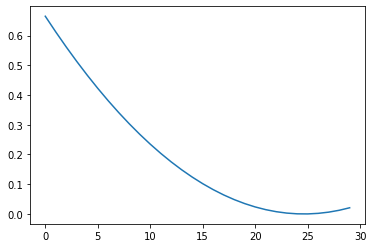

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# 折れ線グラフを出力
height = plot_E
left = range(30)
plt.plot(left, height)

# 終わり

In [ ]:
#終了時刻
finish_time = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
print("finish_time=",finish_time)
print("total_time=",finish_time-start_time)


finish_time= 2021-04-24 07:10:46.317210+09:00
total_time= 0:00:00.262767
